**EECE 798I Assignment 2 - Mining a Personal Block**

Ali ismail

ami31@mail.aub.edu

202022492

In [ ]:
!cp /content/drive/MyDrive/Blockchain/blockchain.py .

In [ ]:
from blockchain import *

# Creating the Block

In [ ]:
hash_652492 = '00000000000000000000f7530ea483ca18ce68c9c5e7fb2b8c123d04da3534f8'
my_data = BlockData('202022492', 'ami31@mail.aub.edu', 'Ali ismail')

In [ ]:
with open('/content/drive/MyDrive/Blockchain/results.txt', 'w') as f:
    f.write('letfmost_zero_bits,nonce,hash,elapsed_time,nb_iterations\n')

In [ ]:
my_block = Block(hash_652492, my_data)

In [ ]:
my_block.display()

---------------Header---------------
Previous Hash: 00000000000000000000f7530ea483ca18ce68c9c5e7fb2b8c123d04da3534f8
Timestamp: 1613670952
nonce: 0
---------------Data---------------
Full Name: Ali ismail
Email: ami31@mail.aub.edu
AUB ID: 202022492


In [ ]:
my_block.display_hex()

---------------Header---------------
00000000000000000000f7530ea483ca18ce68c9c5e7fb2b8c123d04da3534f8
602eaa28
0
---------------Data---------------
416c692069736d61696c
616d693331406d61696c2e6175622e656475
323032303232343932


*I realized too late that the hex representation of the AUB ID here is not the hexadecimal value of the number but instead it is taken as a string and this is the hex value of the encoding.*

# Mining with Difficulty 24

In [ ]:
time, count = my_block.mine(24)
with open('/content/drive/MyDrive/Blockchain/results.txt', 'a') as f:
    f.write(f'24,{my_block.nonce},{my_block.hash()},{time},{count}\n')

In [ ]:
my_block.display()

---------------Header---------------
Previous Hash: 00000000000000000000f7530ea483ca18ce68c9c5e7fb2b8c123d04da3534f8
Timestamp: 1613670952
nonce: 4865010
---------------Data---------------
Full Name: Ali ismail
Email: ami31@mail.aub.edu
AUB ID: 202022492


In [ ]:
my_block.display_hex()

---------------Header---------------
00000000000000000000f7530ea483ca18ce68c9c5e7fb2b8c123d04da3534f8
602eaa28
4a3bf2
---------------Data---------------
416c692069736d61696c
616d693331406d61696c2e6175622e656475
323032303232343932


# Mining with Higher Difficulties

In [ ]:
for difficulty in [24, 25, 26, 27, 28, 29, 30]:
    my_block = Block(hash_652492, my_data)
    time, count = my_block.mine(difficulty)
    with open('/content/drive/MyDrive/Blockchain/results.txt', 'a') as f:
        f.write(f'{difficulty},{my_block.nonce},{my_block.hash()},{time},{count}\n')

# Analyzing Results

Google Colab CPU Specs: Intel Xeon Processor with two cores @ 2.30 GHz and 13 GB RAM (by running cat /proc/cpuinfo).

Could not find exact specifications regarding which generation of the Xeon line of processors is being used.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Blockchain/results.txt', index_col=0)
df

,nonce,hash,elapsed_time,nb_iterations
letfmost_zero_bits,,,,
24,4865010,0000008e9f5f4e89d4397313189f4b4da75d56cfd6f57e...,536.896967,4865010
25,26011767,0000003523b693181666bba1b2efd6872227db2e80d727...,2819.663760,26011767
26,23379315,00000007a4d7ef7886513c3c2611fa88d1960c4c6ecd64...,2491.029109,23379315
27,158334133,0000000787c1fea3853b2ad235eb6bd759131e2ba540d4...,16863.059871,158334133
28,59164704,00000000e084ad5d932bf0f96945d243809bb8998725e8...,6282.023301,59164704


In [ ]:
df['nonce'] = df['nonce'].apply(hex)
df

,nonce,hash,elapsed_time,nb_iterations
letfmost_zero_bits,,,,
24,0x4a3bf2,0000008e9f5f4e89d4397313189f4b4da75d56cfd6f57e...,536.896967,4865010
25,0x18ce877,0000003523b693181666bba1b2efd6872227db2e80d727...,2819.663760,26011767
26,0x164bd73,00000007a4d7ef7886513c3c2611fa88d1960c4c6ecd64...,2491.029109,23379315
27,0x96ffcb5,0000000787c1fea3853b2ad235eb6bd759131e2ba540d4...,16863.059871,158334133
28,0x386c820,00000000e084ad5d932bf0f96945d243809bb8998725e8...,6282.023301,59164704


In [ ]:
itps = (df['nb_iterations']/df['elapsed_time']).mean()
print(f'Average Iterations per Second: {itps}')

Average Iterations per Second: 9295.877279849059


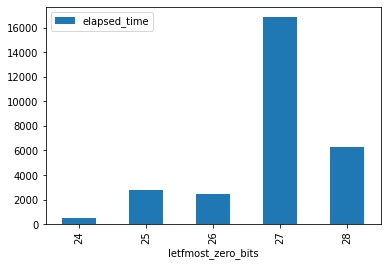

In [ ]:
df.plot.bar(y='elapsed_time');

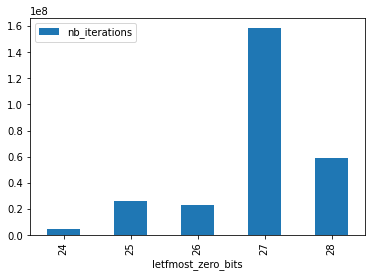

In [ ]:
df.plot.bar(y='nb_iterations');

Mining at difficulty 29 took more than 12 hours which exceeds the maximum time for Colab.

In general, it is expected that when difficulty increases the number of needed iterations should increase as it becomes less and less likely to find a nonce that satisfies the number of leftmost zero bits in the hash.

On a high level, this can be seen to be partially true since the 27 and 28 difficulties took significantly more computations than the lesser ones.

However, the important takeaway here that this is not a rule and cannot be expected to be regularly observed. The 26 difficulty took slightly less iterations than the 25. The 28 difficulty took less than half of the iterations that were needed for the 27 difficulty. Also, in a previous run of this experiment (data not shown here), the 24 difficulty took about twice as much iterations than what is shown here.

This irregularity is due to the memoryless property of this proof-of-work algorithm. There is no progression in the process and the number of needed computations to find a working nonce cannot be anticipated.

*Regarding measurement of energy consumption, I found the two below solutions for measuring the energy consumed when running a block of Python code but both can only run on a machine running linux (not windows or mac). It does not even work on a linux virtual machine (like Colab).*
- https://pyjoules.readthedocs.io/en/latest/#limitation
- https://github.com/responsibleproblemsolving/energy-usage#limitations
